<a href="https://colab.research.google.com/github/aydawudu/Machine-Learning-Course/blob/main/Using_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np
iris =datasets.load_iris()
X =iris.data[:, [2,3]]
y=iris.target
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(
    X,y,test_size=0.3, random_state=1, stratify=y
)

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train',np.bincount(y_train))
print('Labels count in y_test', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels count in y_test [15 15 15]


##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

### Training a perceptron

In [ ]:
from sklearn.linear_model import Perceptron
ppn =Perceptron (eta0=0.1, random_state=1) #eta0 is equivalent to the learning rate. You have to experiment to find the best learning rate
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
# Use train perceptron to predict test data
y_pred=ppn.predict(X_test_std)
print('Misclassified examples: %d ' % (y_test != y_pred).sum()) #show the number of misclassification, 1 out of 45


Misclassified examples: 1 


In [ ]:
#let use accruracy to evaluate performance
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


### let plot the decision boundaries

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

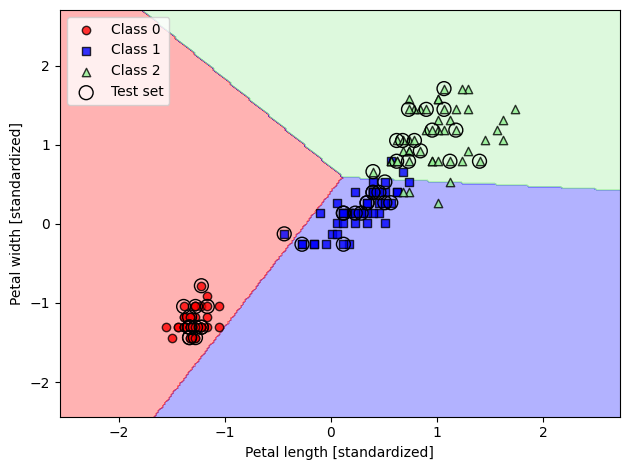

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

###Logistic Regression

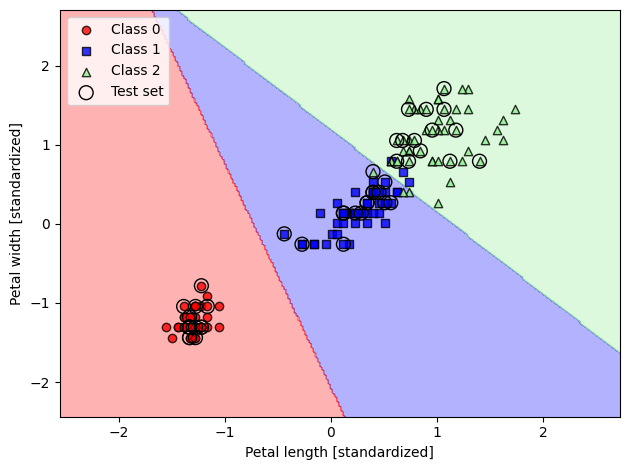

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()

In [ ]:
lr.predict_proba(X_test_std[:3, :]) #predict the probabilities of the first 3 test samples

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [ ]:
#use argmax to find the largest probabilties
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
#we can use predict directly to get the class numbers
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [ ]:
#predict a single row and reshaping it to be two dimensional
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### Dealing with regularization

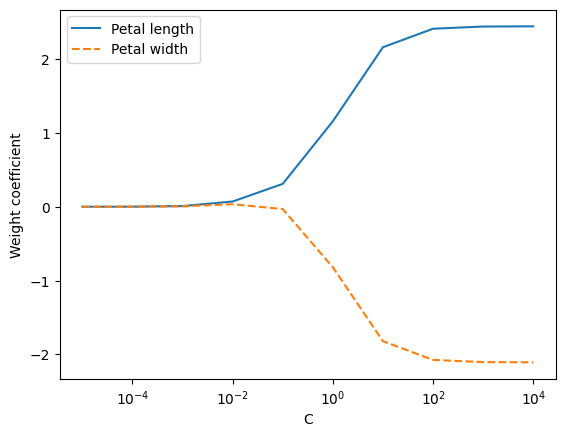

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           # fitting 10 logistic regression models with different values for inverse regulization(parameter C)
weights, params =[], []
for c in np.arange(-5, 5):
  lr=LogisticRegression(C=10.**c,
                        multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)


weights=np.array(weights)
plt.plot(params, weights[:, 0],
         label="Petal length")
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.linear_model import SGDClassifier
ppn=SGDClassifier(loss='perceptron')
lr=SGDClassifier(loss='log')
svm=SGDClassifier(loss='hinge')

#Create Dataset

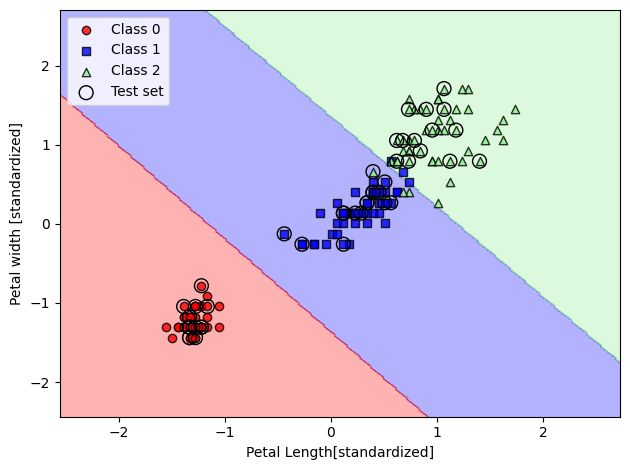

In [ ]:
#Linear SVM
from sklearn.svm import SVC
svm=SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal Length[standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

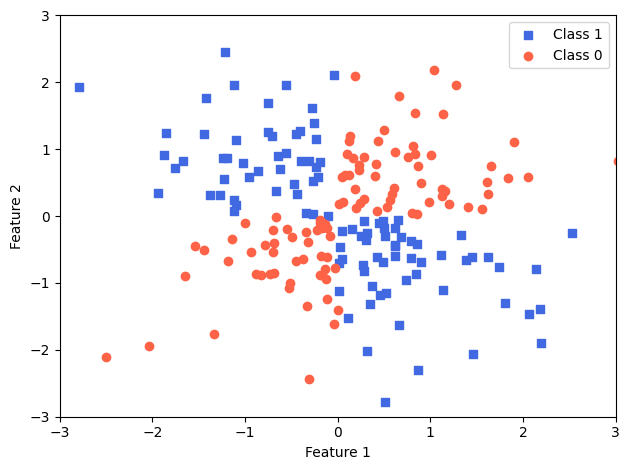

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:, 0]>0,
                     X_xor[:, 1]>0)
y_xor=np.where(y_xor,1,0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor ==1, 1],
            c='royalblue', marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor ==0,0],
            X_xor[y_xor ==0,1],
            c='tomato', marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3,3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

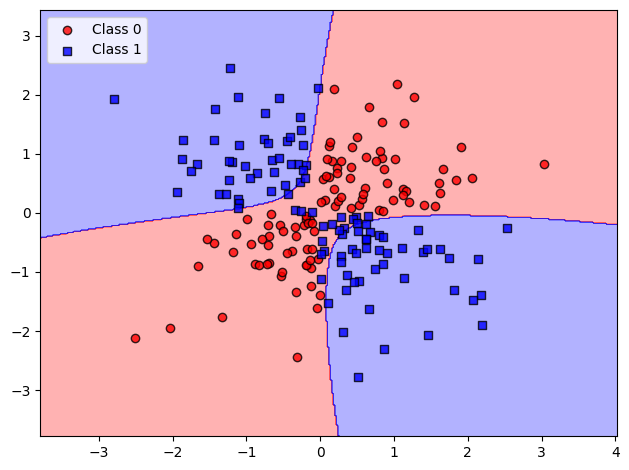

In [ ]:
# Training a kernel svm that draws a nonlinear decision boundary that separates the XOR data well
svm=SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

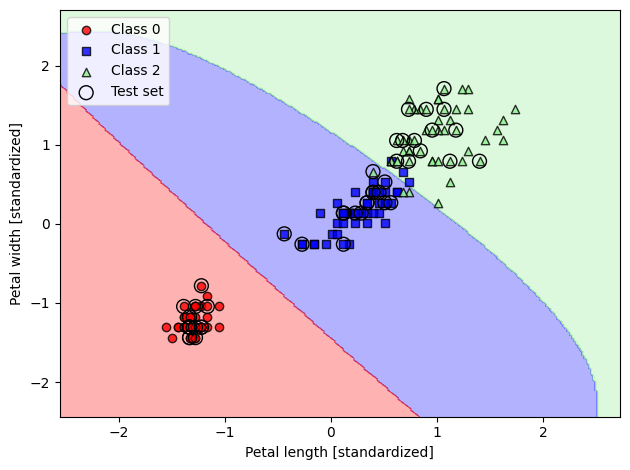

In [ ]:
#Applying RBF Kernel to the IRIS dataset reducing gamma
svm=SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

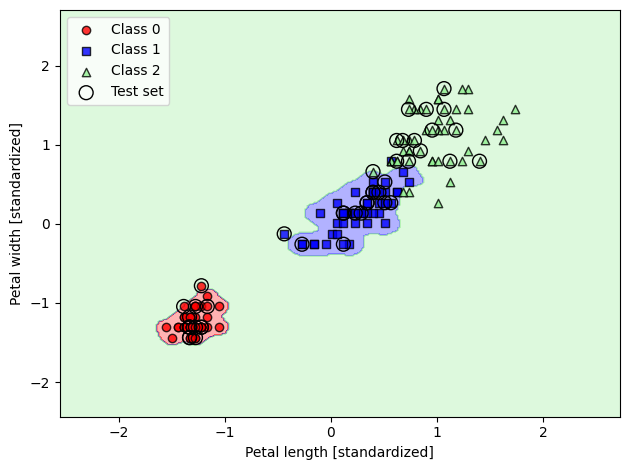

In [ ]:
#Applying RBF Kernel to the IRIS dataset increasing gamma (y value)
svm=SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Decision Tree

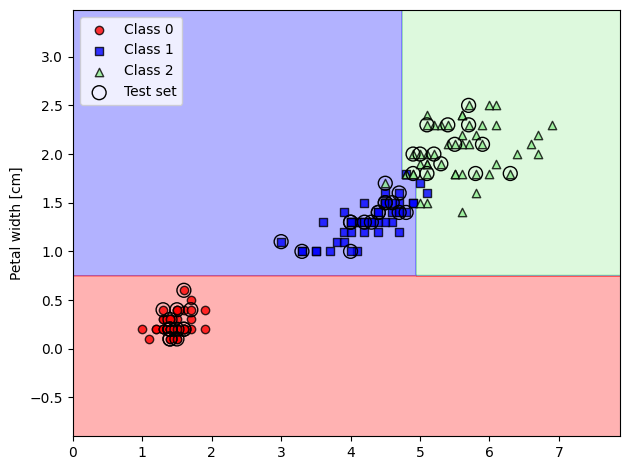

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion='gini',
                                  max_depth=4,
                                  random_state=1)
tree_model.fit(X_train, y_train)
X_combined=np.vstack((X_train, X_test))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel=('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

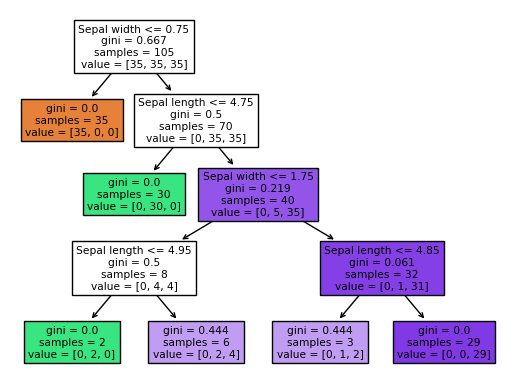

In [ ]:
## Visualizng the decision tree
from sklearn import tree
feature_names=['Sepal length', 'Sepal width',
               'Petal length', 'Petal width']

tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()

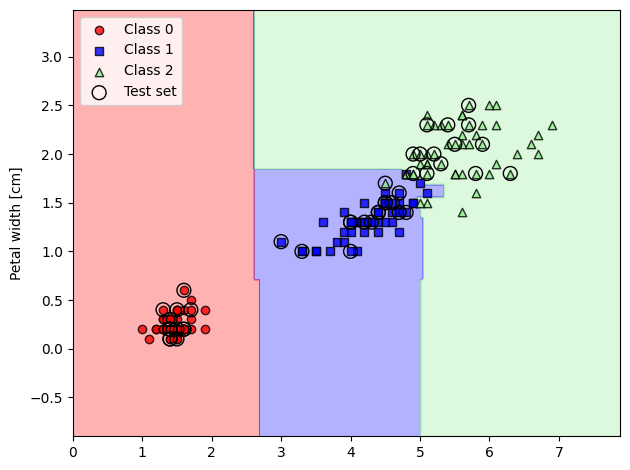

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=25,
                              random_state=1,
                              n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
#plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

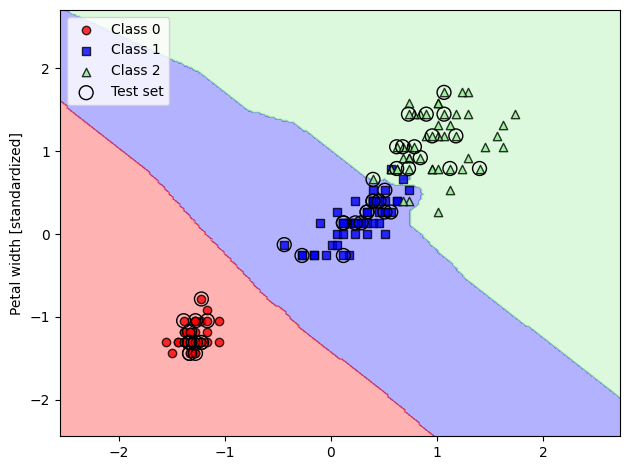

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
#plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()